In [1]:
data="Downloads/data/final_project_dataset_modified.pkl"

In [2]:
import pandas as pd
import numpy as np

In [3]:
dictionary = pd.read_pickle(data)

In [4]:
def featureFormat( dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """


    return_list = []

    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import picklefeatures_list = ["bonus", "salary"]
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print ("error:", key , feature, "not present")
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)

In [5]:
features_list = ["bonus", "salary"]

In [6]:
dataset = featureFormat( dictionary, features_list, remove_any_zeroes=True)

In [7]:
def targetFeatureSplit( dataset ):

    target = []
    features = []
    for item in dataset:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features


In [8]:
y, x = targetFeatureSplit( dataset )

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.model_selection import KFold

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
kfold = KFold(n_splits=10, random_state=None)

In [15]:
from sklearn import linear_model

In [16]:
reg = linear_model.LinearRegression()

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
scoring = "r2"
results = cross_val_score(reg, X_train, y_train, cv=kfold, scoring=scoring)
print(); print("R squared val: ", results.mean()); print("Standard Deviation: ", results.std())


R squared val:  -2.1843000286262457
Standard Deviation:  4.650438081785367


In [19]:
#Not using cross validate
reg.fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)
print(reg.score(X_train, y_train))

[1.94701552]
574358.8632920309
0.03335734522882383


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

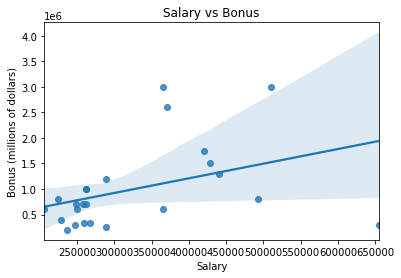

In [21]:
sns.regplot(X_test, y_test);

plt.title('Salary vs Bonus')
# Set x-axis label
plt.xlabel('Salary')
# Set y-axis label
plt.ylabel('Bonus (millions of dollars)')


plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["xtick.labelsize"] = 12